In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot
from statsmodels.tsa.stattools import adfuller

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Time Series Analysis/Python - Time Series Forecasting/Time Series Analysis/Introduction to Time Series Forecasting/bitcoin_price.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3392 entries, 0 to 3391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3392 non-null   object 
 1   Open       3392 non-null   float64
 2   High       3392 non-null   float64
 3   Low        3392 non-null   float64
 4   Close      3392 non-null   float64
 5   Adj Close  3392 non-null   float64
 6   Volume     3392 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 185.6+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3392 entries, 2014-09-17 to 2023-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3392 non-null   float64
 1   High       3392 non-null   float64
 2   Low        3392 non-null   float64
 3   Close      3392 non-null   float64
 4   Adj Close  3392 non-null   float64
 5   Volume     3392 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 185.5 KB


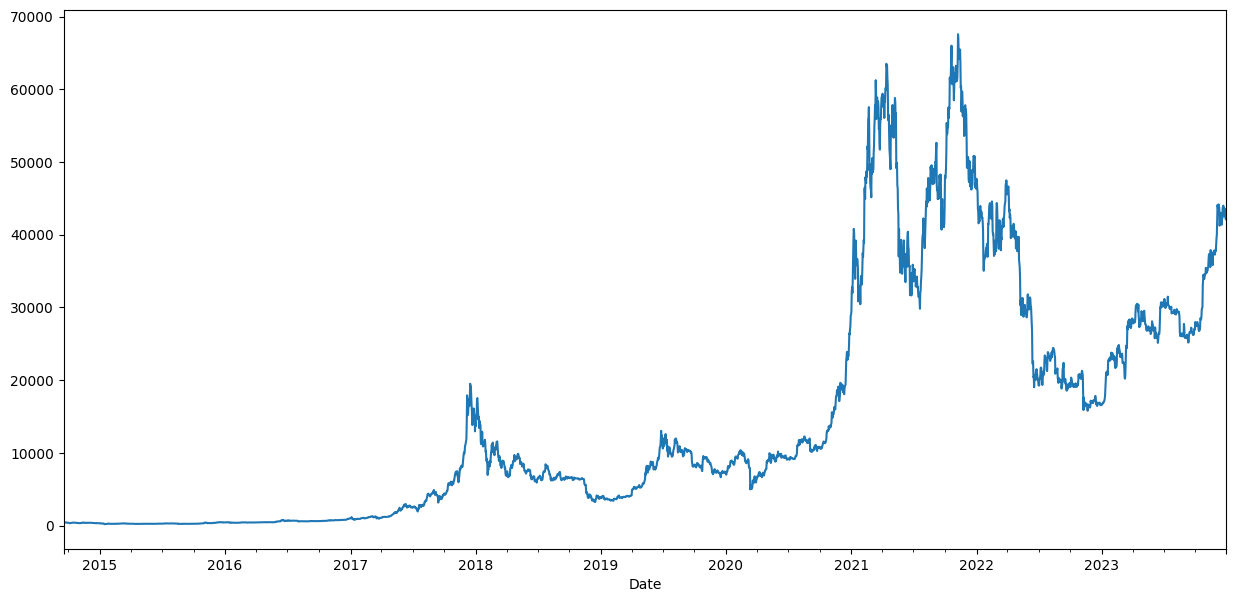

In [ ]:
df['Close'].plot(figsize=(15,7))
plt.show()

7-Day Rolling Average Plot

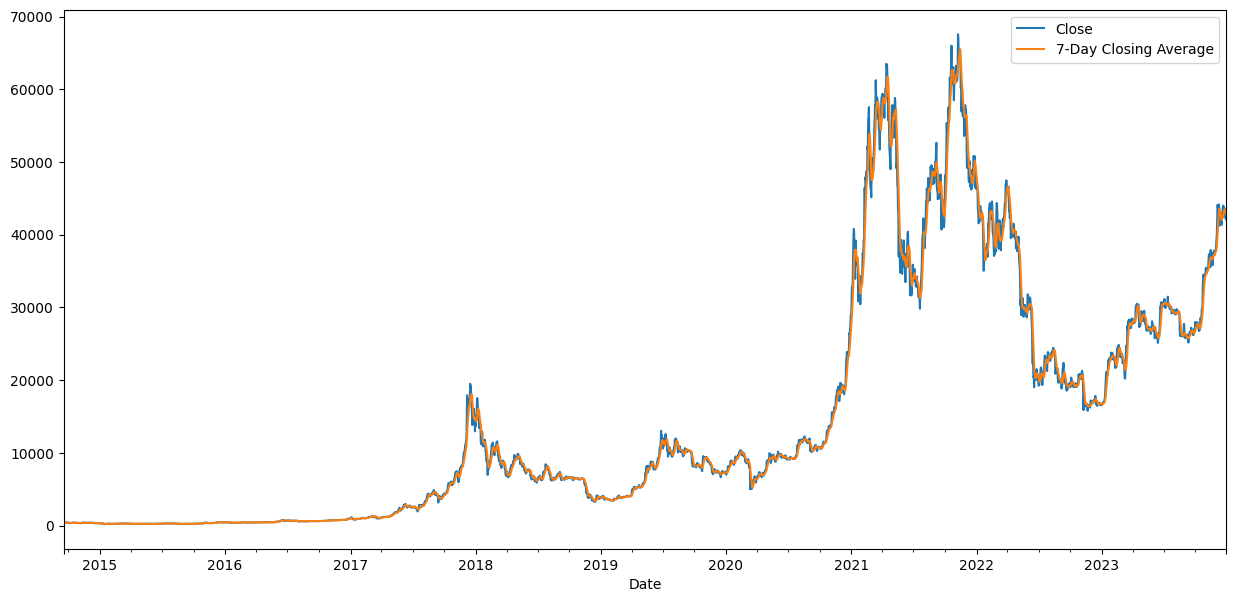

In [ ]:
df['7-Day Closing Average'] = df['Close'].rolling(window=7).mean()
df[['Close', '7-Day Closing Average']].plot(figsize=(15,7))
plt.show()

Let's look just at the year 2023....

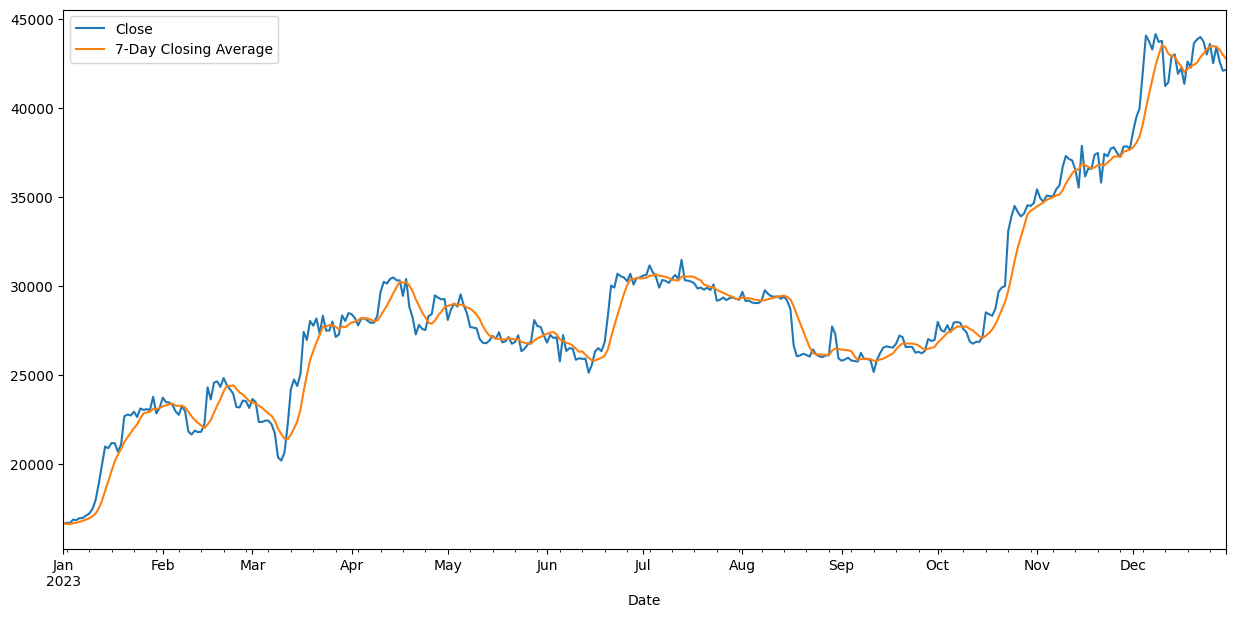

In [ ]:
df[['Close', '7-Day Closing Average']].loc['2023'].plot(figsize=(15,7))
plt.show()

Let's find the month with the highest closing average.

In [ ]:
df.resample('ME').mean()['Close'].idxmax()

Timestamp('2021-11-30 00:00:00')

Percentage change from month to month

In [ ]:
df['Pct Change'] = df['Close'].pct_change()
df.head()

,Open,High,Low,Close,Adj Close,Volume,7-Day Closing Average,Pct Change
Date,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-0.071926
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-0.069843
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,0.035735
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-0.024659


Filter for dates where percentage change (+ or -) is greater than 10%

In [ ]:
df[abs(df['Pct Change']) > 0.1]

,Open,High,Low,Close,Adj Close,Volume,7-Day Closing Average,Pct Change
Date,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200,365.519579,0.151936
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,310.171718,-0.107767
2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904,271.743853,-0.156593
2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704,255.138994,-0.211449
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,244.638280,0.178217
...,...,...,...,...,...,...,...,...
2022-09-09,19328.140625,21439.410156,19310.962891,21381.152344,21381.152344,48469528171,19781.450056,0.106122
2022-11-08,20600.671875,20664.607422,17603.544922,18541.271484,18541.271484,118992465607,20409.998326,-0.100061
2022-11-09,18543.761719,18590.458984,15682.692383,15880.780273,15880.780273,102905151606,19798.752093,-0.143490


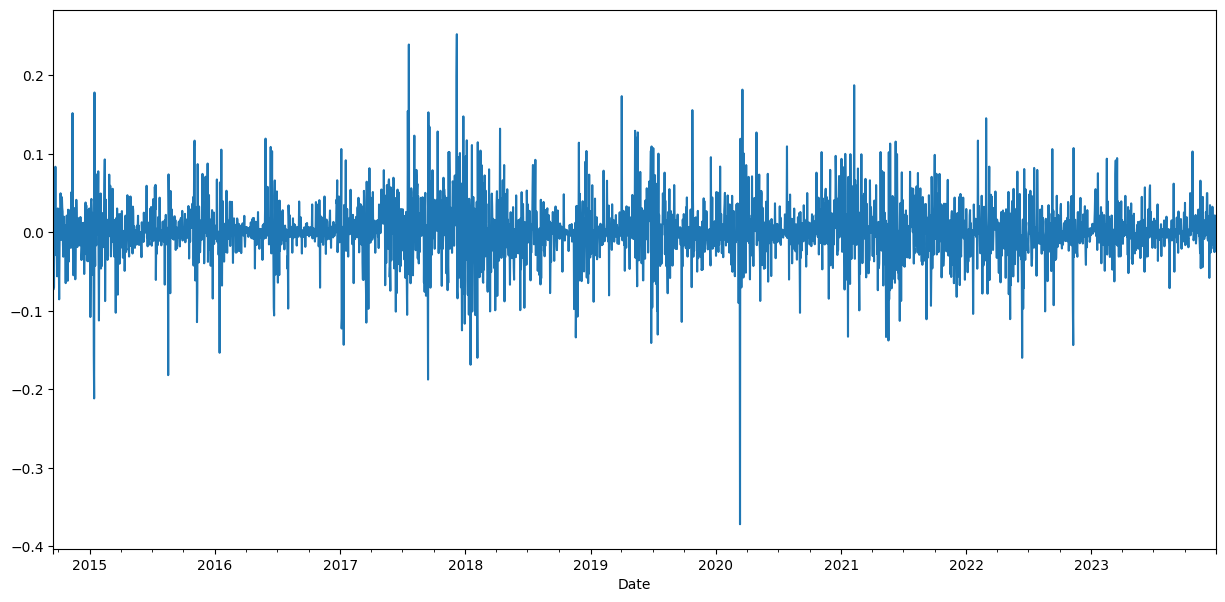

In [ ]:
df['Pct Change'].plot(figsize=(15,7))
plt.show()

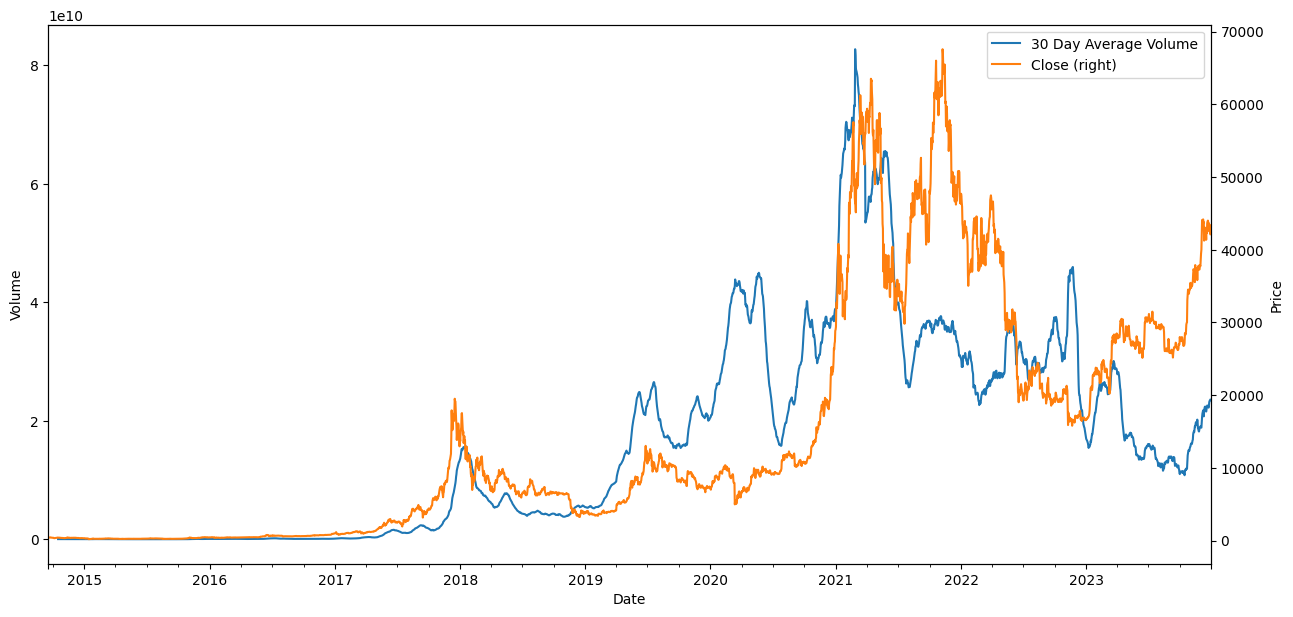

In [ ]:
df['30 Day Average Volume'] = df['Volume'].rolling(window=30).mean()
ax1 = df['30 Day Average Volume'].plot(figsize=(15,7),legend=True)
ax2 = df['Close'].plot(secondary_y=True,legend=True)
ax1.set_ylabel('Volume')
ax2.set_ylabel('Price')
plt.show()

In [ ]:
df['30 Day Average Volume'].corr(df['Close'])

np.float64(0.750445379618605)

Let's look at NULL values...

In [ ]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
7-Day Closing Average,6
Pct Change,1
30 Day Average Volume,29


In [ ]:
df['30 Day Average Volume'].bfill(inplace=True)
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
7-Day Closing Average,6
Pct Change,1
30 Day Average Volume,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3392 entries, 2014-09-17 to 2023-12-30
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   3392 non-null   float64
 1   High                   3392 non-null   float64
 2   Low                    3392 non-null   float64
 3   Close                  3392 non-null   float64
 4   Adj Close              3392 non-null   float64
 5   Volume                 3392 non-null   int64  
 6   7-Day Closing Average  3386 non-null   float64
 7   Pct Change             3391 non-null   float64
 8   30 Day Average Volume  3392 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 265.0 KB


In [ ]:
df['7-Day Closing Average'] = df['7-Day Closing Average'].interpolate(limit_direction='backward')
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
7-Day Closing Average,0
Pct Change,1
30 Day Average Volume,0


# Get year, month and day from index

In [ ]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['weekday_name'] = df.index.day_name()
df['week'] = df.index.isocalendar().week
df['quarter'] = df.index.quarter
df.head()



,Open,High,Low,Close,Adj Close,Volume,7-Day Closing Average,Pct Change,30 Day Average Volume,year,month,day,dayofweek,weekday_name,week,quarter
Date,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,417.462572,NaN,3.624856e+07,2014,9,17,2,Wednesday,38,3
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,417.462572,-0.071926,3.624856e+07,2014,9,18,3,Thursday,38,3
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,417.462572,-0.069843,3.624856e+07,2014,9,19,4,Friday,38,3
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,417.462572,0.035735,3.624856e+07,2014,9,20,5,Saturday,38,3
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,417.462572,-0.024659,3.624856e+07,2014,9,21,6,Sunday,38,3


# Lagged Variables

In [ ]:
df['Close Lag 1'] = df['Close'].shift(1)
df['Close Lag 2'] = df['Close'].shift(2)
df.head()

,Open,High,Low,Close,Adj Close,Volume,7-Day Closing Average,Pct Change,30 Day Average Volume,year,month,day,dayofweek,weekday_name,week,quarter,Close Lag 1,Close Lag 2
Date,,,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,417.462572,NaN,3.624856e+07,2014,9,17,2,Wednesday,38,3,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,417.462572,-0.071926,3.624856e+07,2014,9,18,3,Thursday,38,3,457.334015,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,417.462572,-0.069843,3.624856e+07,2014,9,19,4,Friday,38,3,424.440002,457.334015
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,417.462572,0.035735,3.624856e+07,2014,9,20,5,Saturday,38,3,394.795990,424.440002
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,417.462572,-0.024659,3.624856e+07,2014,9,21,6,Sunday,38,3,408.903992,394.795990


# Seasonality

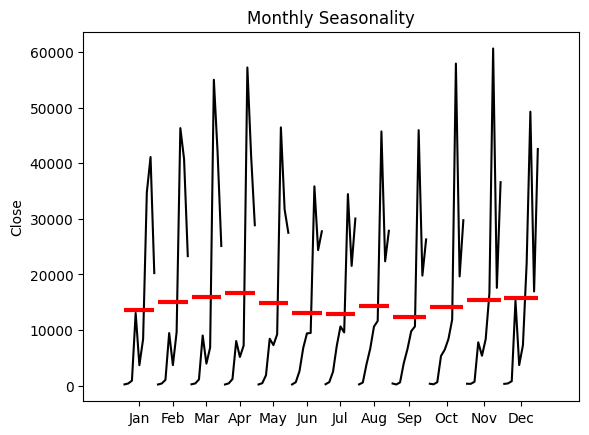

In [ ]:
# Monthly Seasonality
month_plot(df['Close'].resample('ME').mean())
plt.title('Monthly Seasonality')
plt.ylabel('Close')
plt.show()

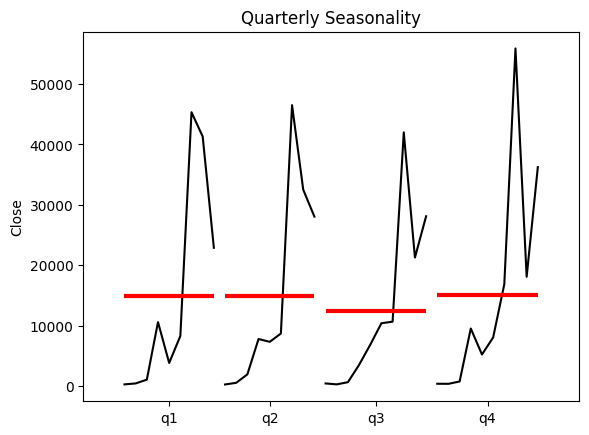

In [ ]:
# Quarterly Seasonality

quarter_plot(df['Close'].resample('QE').mean())
plt.title('Quarterly Seasonality')
plt.ylabel('Close')
plt.show()

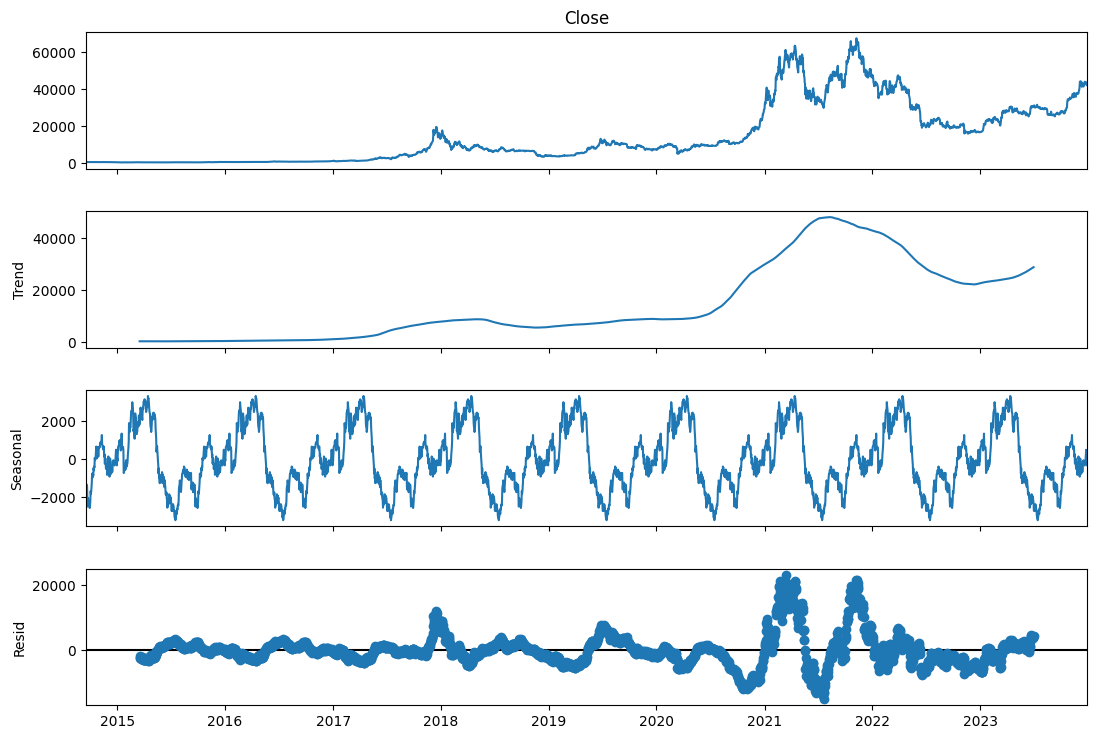

In [ ]:
# Seasonal decomposition of bitcoin 'Close'
result = seasonal_decompose(df['Close'], model='additive', period=365)
fig = result.plot()
fig.set_figheight(8)
fig.set_figwidth(12)
plt.show()

# Let's import another dataset...

In [ ]:
df_choco = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Time Series Analysis/Python - Time Series Forecasting/Time Series Analysis/Introduction to Time Series Forecasting/choco_monthly_revenue.csv')
df_choco.head()

,Month with Year,revenue
0,2018-01-01,1458
1,2018-02-01,1102
2,2018-03-01,1584
3,2018-04-01,1676
4,2018-05-01,1461


In [ ]:
df_choco['Month with Year'] = pd.to_datetime(df_choco['Month with Year'])
df_choco.set_index('Month with Year', inplace=True)
df_choco.head()

,revenue
Month with Year,
2018-01-01,1458
2018-02-01,1102
2018-03-01,1584
2018-04-01,1676
2018-05-01,1461


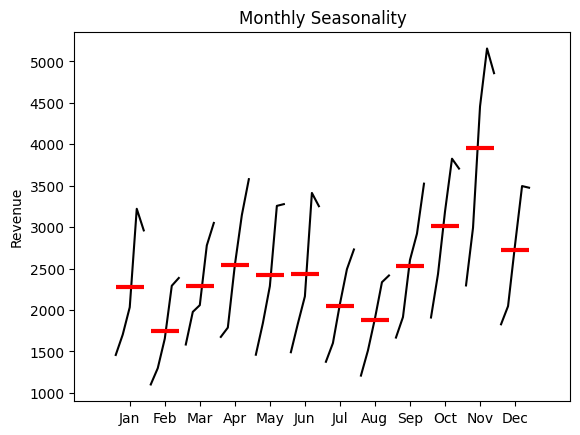

In [ ]:
# Get the month_plot for df_choco
month_plot(df_choco['revenue'].resample('ME').mean())
plt.title('Monthly Seasonality')
plt.ylabel('Revenue')
plt.show()

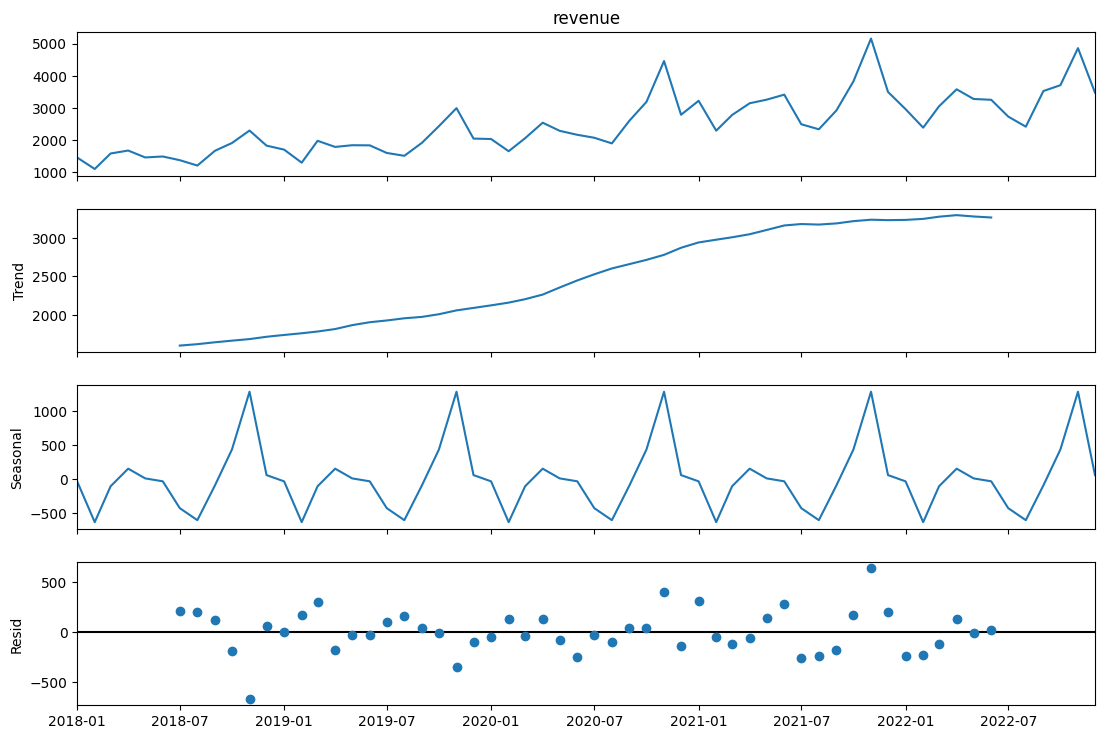

In [ ]:
# Seasonal decomposition of df_choco['revenue']
result = seasonal_decompose(df_choco['revenue'], model='additive', period=12)
fig = result.plot()
fig.set_figheight(8)
fig.set_figwidth(12)
plt.show()

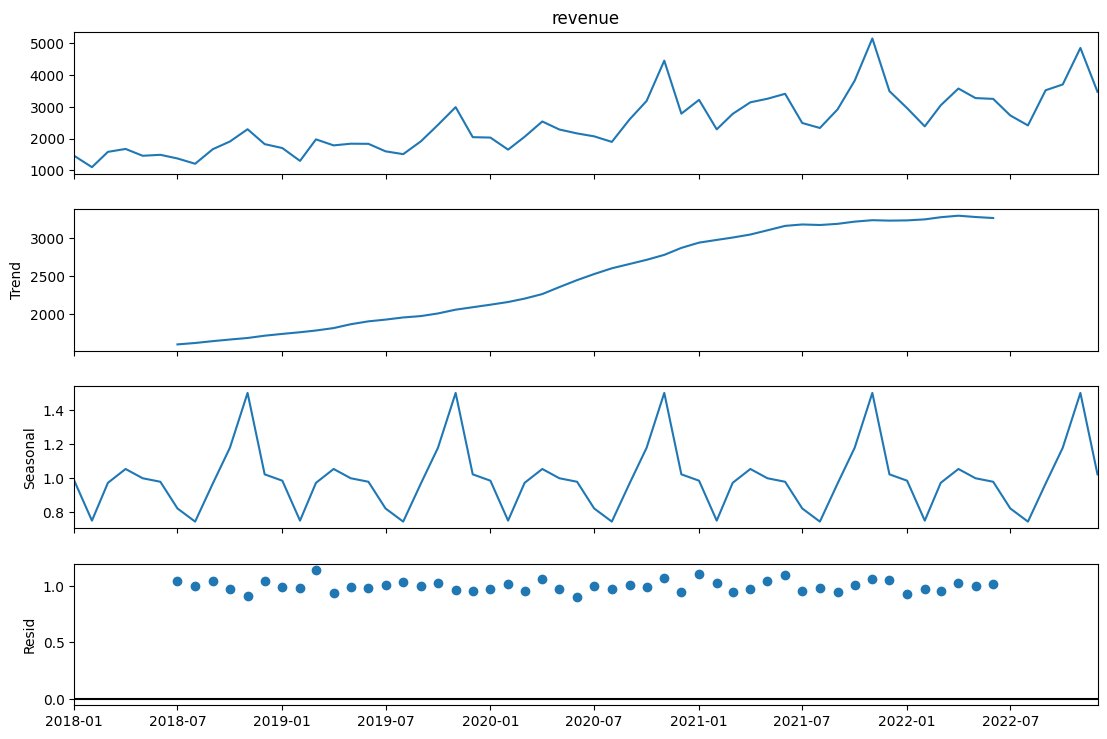

In [ ]:
# Seasonal decomposition of df_choco['revenue'] with multiplicative (because df_choco['revenue'] has a positive trend)
result = seasonal_decompose(df_choco['revenue'], model='multiplicative', period=12)
fig = result.plot()
fig.set_figheight(8)
fig.set_figwidth(12)
plt.show()

# Auto-Correlation Function (ACF)

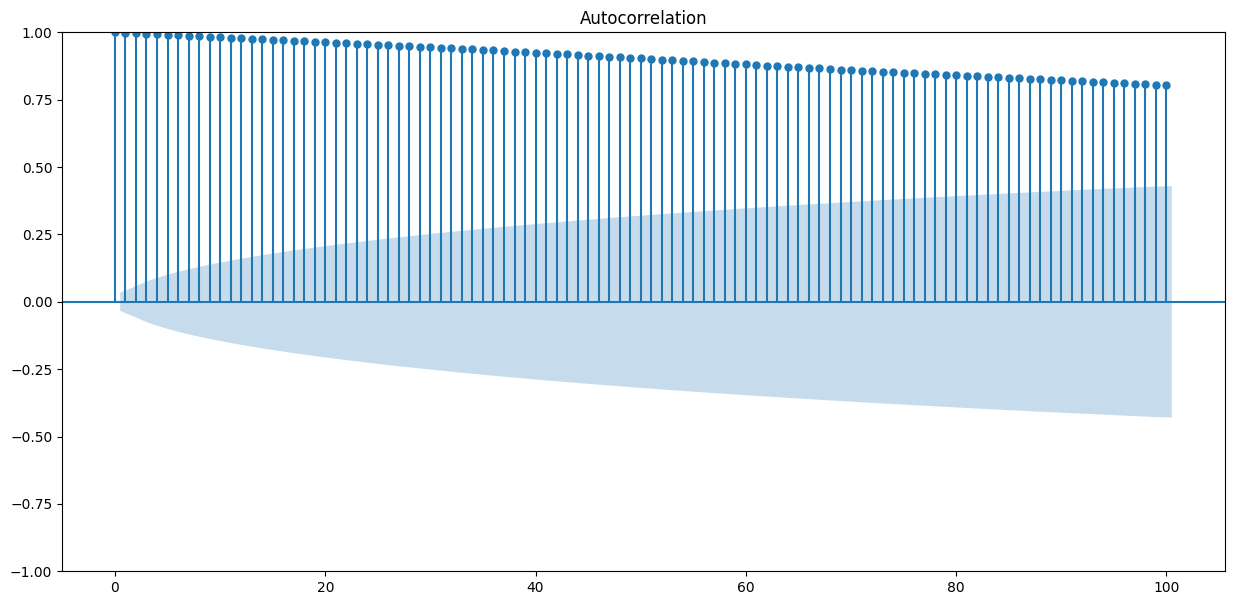

In [ ]:
# Plot the ACF for the bitcoin 'Close' data
fig, ax = plt.subplots(figsize=(15,7))
plot_acf(df['Close'], lags=100, ax=ax)
plt.show()

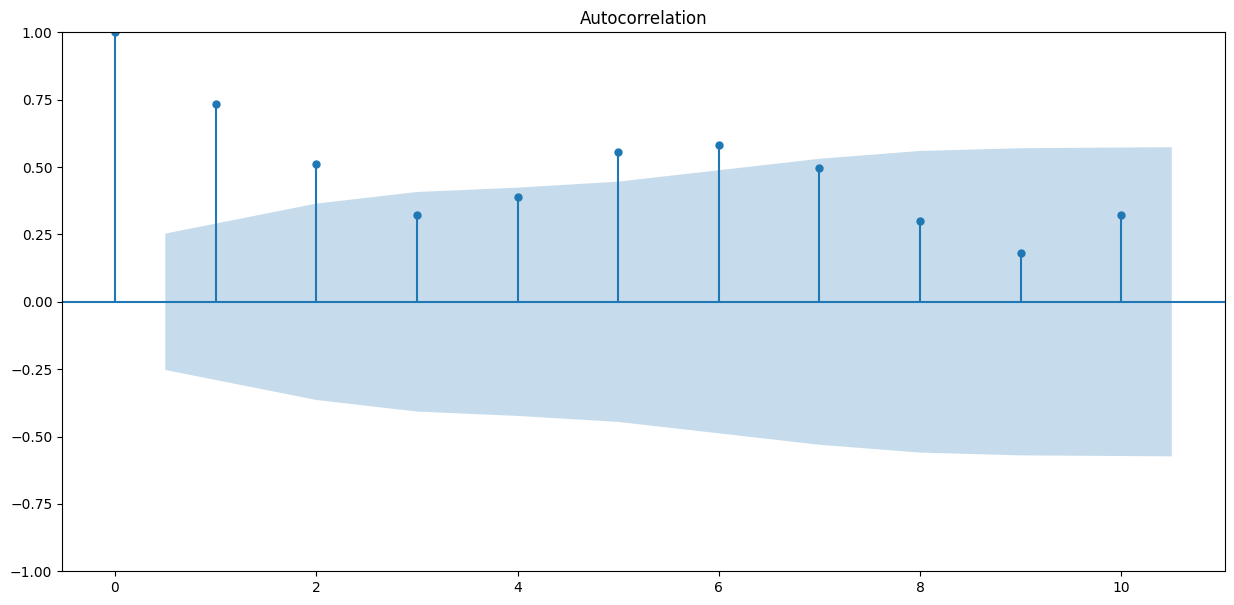

In [ ]:
# Plot the ACF for the df_choco['revenue'] data
fig, ax = plt.subplots(figsize=(15,7))
plot_acf(df_choco['revenue'], lags=10, ax=ax)
plt.show()

# Partial Auto-Correlation (PACF)

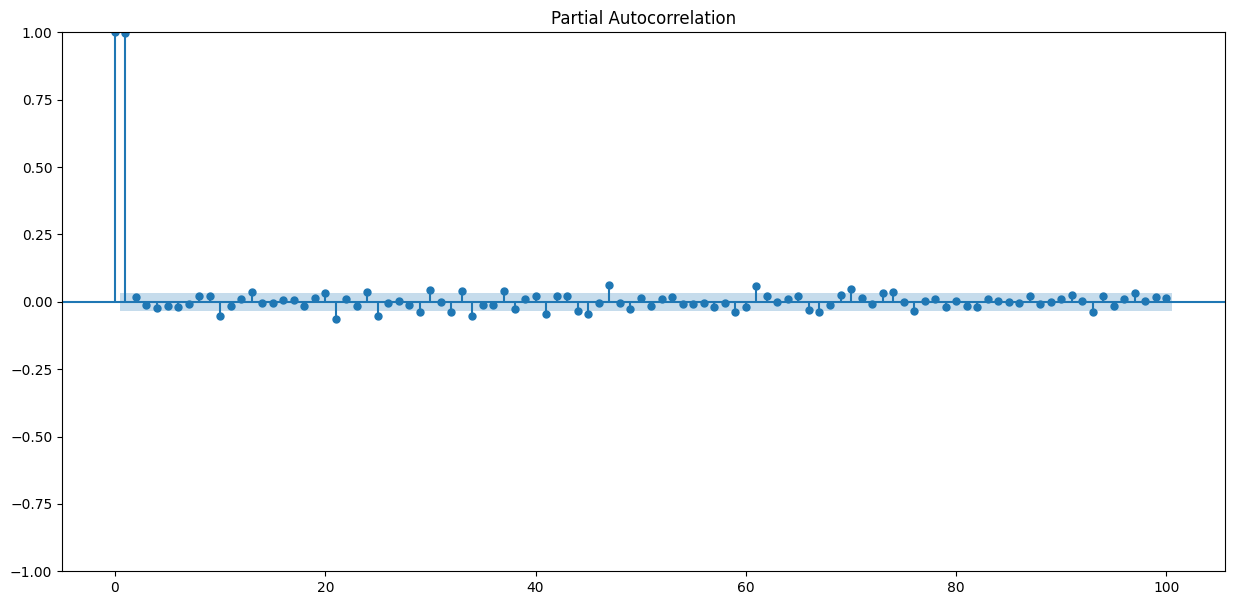

In [ ]:
# PACF of bitcoin 'Adj Close'
fig, ax = plt.subplots(figsize=(15,7))
plot_pacf(df['Close'], lags=100, ax=ax)
plt.show()

So, we conclude that the only relevant information in predicting the price of bitcoin is the value of bitcoin the day before.

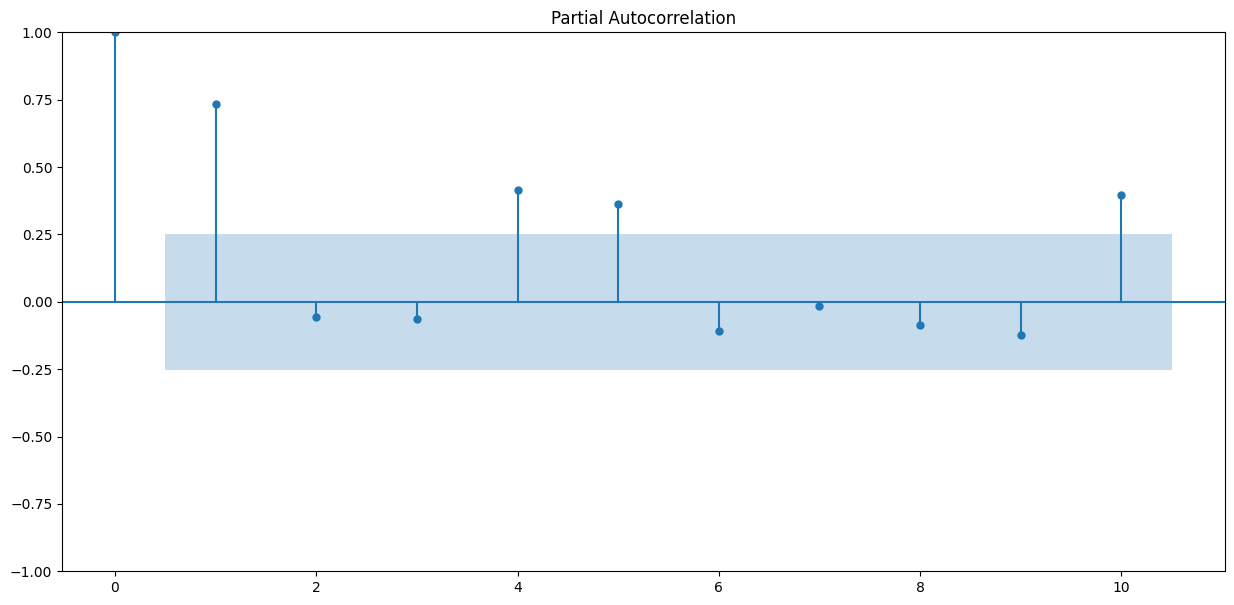

In [ ]:
# Plot the ACF for the df_choco['revenue'] data
fig, ax = plt.subplots(figsize=(15,7))
plot_pacf(df_choco['revenue'], lags=10, ax=ax)
plt.show()